# <p style="text-align:center;text-decoration:underline">Homework-2</p>

In [79]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from datetime import datetime
import gmplot as gp

ModuleNotFoundError: No module named 'wordcloud'

In [2]:
def readFile(file):
    try:
        return pd.read_csv(file,header=None).values
    except:
        print("Error reading file "+file)
        return None

In [3]:
data=readFile("BDP-HW1-Datasets/baltimore_crimes.csv")
#creating attribute index from header
attrDict={ attr:index for index,attr in enumerate(data[0])}
data=data[1:] #remaining data without header

# data=data[:100,:]

In [4]:
def barPlot(x,y,xlabel,ylabel,title):
    plt.bar(x,y)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.xticks(x, fontsize=10, rotation=90)
    plt.title(title,fontsize=15)
#     plt.grid(True)
    plt.show()

In [5]:
def crimeFreq(attr):
    x=data[:,attrDict[attr]]
    x=np.unique(x,return_counts=True)
    y=x[1]
    x=x[0]
    if attr=="District":
        print("===========================================")
        print("District with most and least number of crime incidents")
        print("===========================================")
        print("%s | %s"%(x[np.argmax(y)],y[np.argmax(y)]))
        print("%s | %s"%(x[np.argmin(y)],y[np.argmin(y)]))
        print("===========================================")
    else:
        attr="Crime Type"
        print("===========================================")
        print("Crime mostly and least occured")
        print("===========================================")
        print("%s | %s"%(x[np.argmax(y)],y[np.argmax(y)]))
        print("%s | %s"%(x[np.argmin(y)],y[np.argmin(y)]))
        print("===========================================")
    barPlot(x,y,attr,"Crime Frequency","Crime Frequency vs " +attr+ " of baltimore")

In [6]:
def heatMap(locations,filename):
    print("Check %s"%(filename))
    locations=[eval(x) for x in locations]
    locations=list(zip(*locations))
    heat_lats=list(locations[0])
    heat_lngs=list(locations[1])
    
    gmap=gp.GoogleMapPlotter(39.2904, -76.6122, 16)
    gmap.heatmap(heat_lats, heat_lngs)
    gmap.draw(filename)

## <p style="padding: 10px;background:yellow;text-decoration:underline;text-align:center">Part 1</p>

## 1.

District with most and least number of crime incidents
SOUTHEASTERN | 2828
NORTHEASTERN | 51


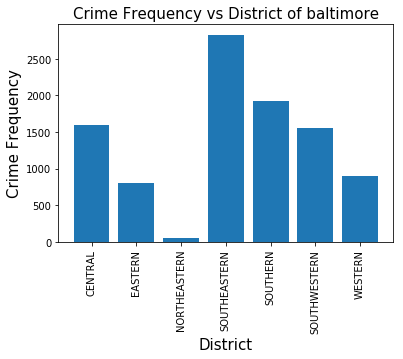

In [7]:
crimeFreq("District")

## 2.

In [8]:
heatMap(data[:,attrDict["Location 1"]],"All-Crimes.html")

Check All-Crimes.html


## 3.

Day with most number of crime incidents
Tuesday | 1459


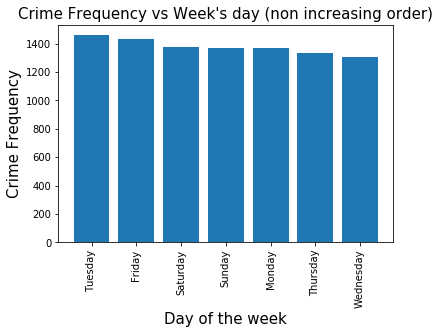

Time with most number of crime incidents
18-19 | 605
Crime occured most in between 20:00 - 23:59
LARCENY FROM AUTO | 358


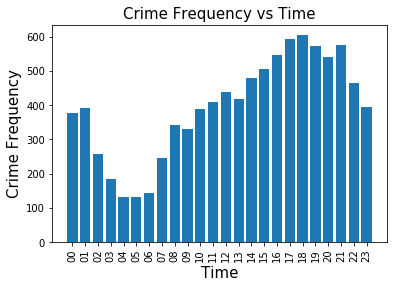

In [9]:
def dayTimeCrime():
    
    #first - bar graph- week day vs crime frequency in non-increasing order of crime frequency
    x=data[:,attrDict["CrimeDate"]]
    x=[datetime.strptime(date, '%m/%d/%Y').strftime('%A') for date in x]
    x=np.unique(x,return_counts=True)
    y=x[1]
    x=x[0]
    orderedFreqVsDay=sorted({y:x for x,y in zip(x,y)}.items(),reverse=True)
    print("===========================================")
    print("Day with most number of crime incidents")
    print("===========================================")
    print("%s | %s"%(x[np.argmax(y)],y[np.argmax(y)]))
    print("===========================================")
    listTuples=(list(zip(*orderedFreqVsDay)))
    barPlot(list(listTuples[1]),list(listTuples[0]),"Day of the week","Crime Frequency","Crime Frequency vs Week's day (non increasing order)")
    
    
    #second - bar graph time vs crime frequency
    x=data[:,attrDict["CrimeTime"]]
    xtemp=[]
    crimeCode=data[:,attrDict["Description"]]
    ccBetween202359=[]
    for date,cc in zip(x,crimeCode) :
        index=date.find(":")
        if index!=-1:
            hr=date[:index]
            xtemp.append(hr)
            if int(hr)>=20 and int(hr):
                ccBetween202359.append(cc)  
    x=np.unique(xtemp,return_counts=True)
    y=x[1]
    x=x[0]
    
    ccBetween202359=np.unique(ccBetween202359,return_counts=True)
    
    print("===========================================")
    print("Time with most number of crime incidents")
    print("===========================================")
    print("%s-%d | %s"%(x[np.argmax(y)],(int(x[np.argmax(y)])+1)%24,y[np.argmax(y)]))
    print("===========================================")
    print("Crime occured most in between 20:00 - 23:59")
    print("===========================================")
    print("%s | %s"%(ccBetween202359[0][np.argmax(ccBetween202359[1])],ccBetween202359[1][np.argmax(ccBetween202359[1])]))
    print("===========================================")
    barPlot(x,y,"Time","Crime Frequency","Crime Frequency vs Time")
dayTimeCrime()

## 4.

Crime mostly and least occured
LARCENY | 2153
RAPE | 47


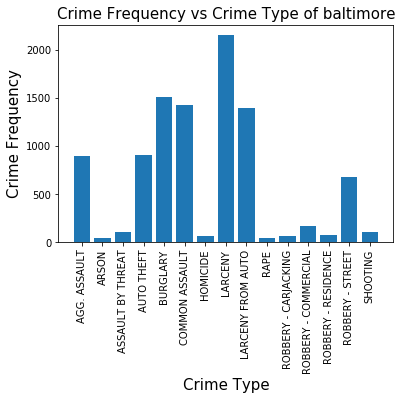

Time when most number of LARCENY incidents occured
16 | 160


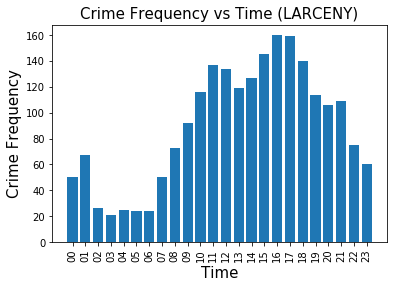

For heat map of most frequent crime in city : 
Check Most-Popular-Crime.html


In [10]:
def subpart4():
    #first Graph
    crimeFreq("Description")
    
    #second- bar graph most frequent crime and its time distribution
    crimes=data[:,attrDict["Description"]]
    uniqueCrimes,counts=np.unique(crimes,return_counts=True)
    mostFCrime=uniqueCrimes[np.argmax(counts)]
    hrs=[ hr[:hr.find(":")] for hr in data[np.where(crimes==mostFCrime),attrDict["CrimeTime"]][0] if ":" in hr]
    latlongs=[latlong for latlong in data[np.where(crimes==mostFCrime),attrDict["Location 1"]][0]]
    uniqueHrs,counts=np.unique(hrs,return_counts=True)
    
    print("===========================================")
    print("Time when most number of %s incidents occured"%(mostFCrime))
    print("===========================================")
    print("%s | %s"%(uniqueHrs[np.argmax(counts)],counts[np.argmax(counts)]))
    print("===========================================")
    barPlot(uniqueHrs,counts,"Time","Crime Frequency","Crime Frequency vs Time "+"("+mostFCrime+")")
    
    #third - heatmap of most popular crime (larceny)
    print("===========================================")
    print("For heat map of most frequent crime in city : ")
    heatMap(latlongs,"Most-Popular-Crime.html")
    
subpart4()

## <p style="padding: 10px;background:yellow;text-decoration:underline;text-align:center">Part 2</p>

## 1.

In [11]:
data=pd.read_excel("BDP-HW1-Datasets/global_terrorism_database.xlsx",nrows=1000,parse_cols="B,K")

/home/anuj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  """Entry point for launching an IPython kernel.


Decade when most number of terrorist attacks in north america
1970 | 682


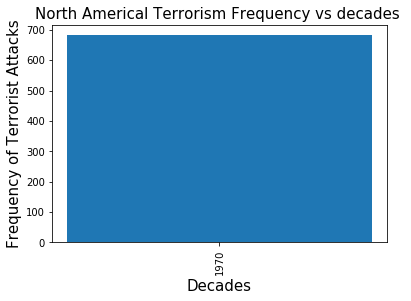

Year in which most attack takes place: 1970 (across globe)


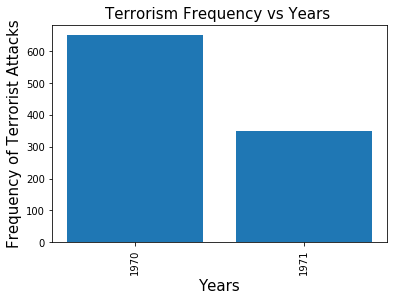

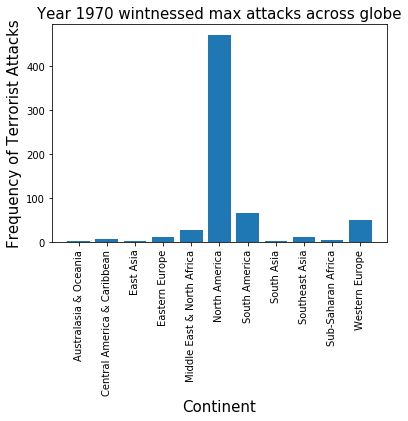

In [77]:
def part1And2():
    years=data["iyear"].values
    conti=data["region_txt"].values
#     summary=data["iyear"].values
    contiVsYear={}
    yearVsConti={}
    yearsCount={}
    NAdecades=[]
    for key,val  in zip(conti,years):
        if key=="North America":
            NAdecades.append(val-(val%10))
        yearVsConti.setdefault(val, []).append(key)
        contiVsYear.setdefault(key, []).append(val)
    yearAttrackCount=[len(val) for val in yearVsConti.values()]
    maxAttackYear=list(yearVsConti.keys())[np.argmax(yearAttrackCount)]
    mxYrConti,mxYearCount=np.unique(yearVsConti[maxAttackYear],return_counts=True)
    
    NADecadesUnique,NAcounts=np.unique(NAdecades,return_counts=True)
    print("===========================================")
    print("Decade when most number of terrorist attacks in north america")
    print("===========================================")
    print("%s | %s"%(NADecadesUnique[np.argmax(NAcounts)],NAcounts[np.argmax(NAcounts)]))
    print("===========================================")
    barPlot(NADecadesUnique,NAcounts,"Decades","Frequency of Terrorist Attacks","North Americal Terrorism Frequency vs decades ")
    
    print("===========================================")
    print("Year in which most attack takes place: %s (across globe)"%(maxAttackYear))
    print("===========================================")
    barPlot(list(yearVsConti.keys()),yearAttrackCount,"Years","Frequency of Terrorist Attacks","Terrorism Frequency vs Years ")
    barPlot(mxYrConti,mxYearCount,"Continent","Frequency of Terrorist Attacks","Year %s wintnessed max attacks across globe"%(maxAttackYear))
part1And2()


## 2.

## 3.

## 4.